<a href="https://colab.research.google.com/github/Maheshnk87/Deep-Learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [28]:
model= Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True,))
model.add(SimpleRNN(32,return_sequences=True,))
model.add(SimpleRNN(32,return_sequences=True,))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_feature=10000
maxlen=500
batch_size=32


In [30]:
print('Loading the data......')
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_feature,)
print(len(input_train),'train sequence')
print(len(input_test),'test sequence')
print('Pad sequence sample x time')
input_train=sequence.pad_sequences(input_train, maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape: ',input_train.shape)
print('input_train shape :',input_test.shape)

Loading the data......
25000 train sequence
25000 test sequence
Pad sequence sample x time
input_train shape:  (25000, 500)
input_train shape : (25000, 500)


In [31]:
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Embedding(max_feature,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
rnnmodel=model.fit(input_train, y_train, batch_size=128, epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 145ms/step - loss: 0.6006 - accuracy: 0.6627 - val_loss: 0.4042 - val_accuracy: 0.8386
Epoch 2/10
157/157 [==============================] - 22s 141ms/step - loss: 0.3813 - accuracy: 0.8421 - val_loss: 0.5389 - val_accuracy: 0.7778
Epoch 3/10
157/157 [==============================] - 22s 143ms/step - loss: 0.3030 - accuracy: 0.8795 - val_loss: 0.3465 - val_accuracy: 0.8670
Epoch 4/10
157/157 [==============================] - 22s 142ms/step - loss: 0.2649 - accuracy: 0.8996 - val_loss: 0.3433 - val_accuracy: 0.8552
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.2193 - accuracy: 0.9175 - val_loss: 0.4205 - val_accuracy: 0.8578
Epoch 6/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1863 - accuracy: 0.9326 - val_loss: 0.3505 - val_accuracy: 0.8674
Epoch 7/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1500 - accuracy: 0.9475 - val_loss: 0.4423 - val_ac

In [32]:
import matplotlib.pyplot as plt


In [33]:
acc=rnnmodel.history['accuracy']
val_acc=rnnmodel.history['val_accuracy']
acc_loss=rnnmodel.history['loss']
val_loss=rnnmodel.history['val_loss']
epochs=range(1,len(acc)+1)

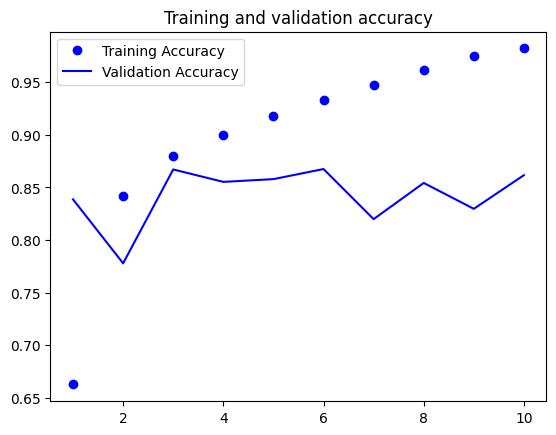

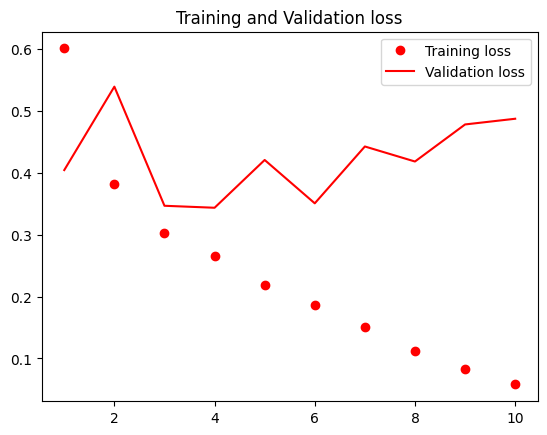

In [34]:
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,acc_loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [35]:
### the model is overfitting after  epochs= 3,